# Analysis of MMSplice Predictions for ClinVar Variants

This Jupyter notebook analyses MMSplice predictions to compare pathogenicity scores between benign and pathogenic ClinVar variants. [MMSplice](https://github.com/gagneurlab/MMSplice_MTSplice?tab=readme-ov-file) predicts the splicing effects of genetic variants, which can help interpret the potential pathogenicity of these variants.

We have already computed MMSplice [outputs](https://github.com/Carina2504/mmsplice_clinvar_eval_public) for ClinVar variants on chromosome 1 annotated as either benign or pathogenic.


### Clone the github repository to have access to the output files

In [50]:
!git clone https://github.com/Carina2504/mmsplice_clinvar_eval_public.git

Cloning into 'mmsplice_clinvar_eval_public'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 20 (delta 1), reused 7 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (20/20), 75.68 MiB | 33.33 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [51]:
cd mmsplice_clinvar_eval_public/output

/content/mmsplice_clinvar_eval_public/output/mmsplice_clinvar_eval_public/output/mmsplice_clinvar_eval_public/output/mmsplice_clinvar_eval_public/output


In [52]:
ll

total 3372
-rw-r--r-- 1 root 2105819 Jan 15 14:13 benign_predictions.tsv
-rw-r--r-- 1 root       0 Jan 15 14:13 __init__.py
-rw-r--r-- 1 root 1340738 Jan 15 14:13 pathogenic_predictions.tsv


# Task
Create a Jupyter notebook to analyse the differences in MMSplice predictions between benign and pathogenic ClinVar variants. Provide at least a convincing plot that compares the pathogenicity scores between benign and pathogenic variants.

### Import dependencies

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Exploration

We start by reading the benign and pathogenic variant files into pandas DataFrames. These files contain MMSplice predictions for ClinVar variants. We will first focus on the pathogenicity column for comparison, and later on the delta_logit_psi and region columns for a more in depth analysis.

In [54]:
benign_data = pd.read_csv('benign_predictions.tsv', sep='\t')
pathogenic_data = pd.read_csv('pathogenic_predictions.tsv', sep='\t')

In [55]:
benign_data.head(n=3)

,ID,delta_logit_psi,exons,exon_id,gene_id,gene_name,transcript_id,region,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity,efficiency
0,1:100133290:C>A,0.000590,1:100133135-100135379:+,ENST00000605613.1,ENSG00000099260,ENSG00000099260,ENST00000605613,exonic,-1.265571,1.680575,-4.513797,-2.311384,0.105083,-1.265571,1.680575,-4.513834,-2.311384,0.105083,0.919051,-0.122631
1,1:100154632:A>T,-0.004351,1:100154330-100155428:+,ENST00000263174.7,ENSG00000099260,ENSG00000099260,ENST00000263174,exonic,-2.917497,3.275725,-3.445814,3.372061,0.219890,-2.917497,3.275725,-3.449044,3.372061,0.219890,0.272513,-0.134879
2,1:100155193:G>T,-0.018717,1:100154330-100155428:+,ENST00000263174.7,ENSG00000099260,ENSG00000099260,ENST00000263174,exonic,-2.917497,3.275725,-3.445814,3.372061,0.219890,-2.917497,3.275725,-3.458327,3.372061,0.219890,0.271919,-0.170489


In [56]:
pathogenic_data.head(n=3)

,ID,delta_logit_psi,exons,exon_id,gene_id,gene_name,transcript_id,region,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity,efficiency
0,1:100316614:C>T,-0.462546,1:100316590-100316680:+,ENST00000370165.2,ENSG00000162688,ENSG00000162688,ENST00000370165,exonic,-2.424089,-1.669004,-3.128117,3.902388,0.768618,-2.424089,-1.669004,-3.427415,3.902388,0.768618,0.396094,-1.270606
1,1:100316614:CAG>C,-0.059435,1:100316590-100316680:+,ENST00000370165.2,ENSG00000162688,ENSG00000162688,ENST00000370165,exonic,-2.424089,-1.669004,-3.128117,3.902388,0.768618,-2.424089,-1.669004,-3.166940,3.902388,0.768618,0.416362,-0.271417
2,1:100316619:TC>T,-0.113956,1:100316590-100316680:+,ENST00000370165.2,ENSG00000162688,ENSG00000162688,ENST00000370165,exonic,-2.424089,-1.669004,-3.128117,3.902388,0.768618,-2.424089,-1.669004,-3.202169,3.902388,0.768618,0.413603,-0.406557


In [57]:
pathogenic_data['region'].unique()

array(['exonic', 'donor', 'donor_dinu', 'acceptor_dinu', 'acceptor',
       'intronic'], dtype=object)

We check for missing values in the "pathogenicity" column, since this is the column we want to analyze first. In addition, we compute some summary statistics to get a quick overview over the data that we want to analyze. For that, we combined the benign and pathogenic  variants data.

In [58]:
# Check for missing values in the 'pathogenicity' column
benign_na_count = benign_data['pathogenicity'].isna().sum()
pathogenic_na_count = pathogenic_data['pathogenicity'].isna().sum()

print(f"Number of missing values in benign data: {benign_na_count}")
print(f"Number of missing values in pathogenic data: {pathogenic_na_count}")

print("\n")

# Add column for variant type
benign_data['Type'] = 'Benign'
pathogenic_data['Type'] = 'Pathogenic'

# Combine into one DataFrame
combined_data = pd.concat([benign_data, pathogenic_data])

# Summary statistics
print("Summary Statistics:")
print(combined_data.groupby('Type')['pathogenicity'].describe())

Number of missing values in benign data: 0
Number of missing values in pathogenic data: 0


Summary Statistics:
             count      mean       std           min       25%       50%  \
Type                                                                       
Benign      7598.0  0.384822  0.308797  9.641877e-08  0.140600  0.271941   
Pathogenic  4763.0  0.458291  0.342172  1.463199e-05  0.161973  0.319873   

                 75%  max  
Type                       
Benign      0.605899  1.0  
Pathogenic  0.879806  1.0  


Now we want to take a look at the data distribution. The easiest way to visualize and compare the scores is by using a boxplot, since it visualizes the most important statistical measures which are also shown above.

<ipython-input-59-923da660b66c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x='Type', y='pathogenicity', palette={'Benign': 'blue', 'Pathogenic': 'orange'})


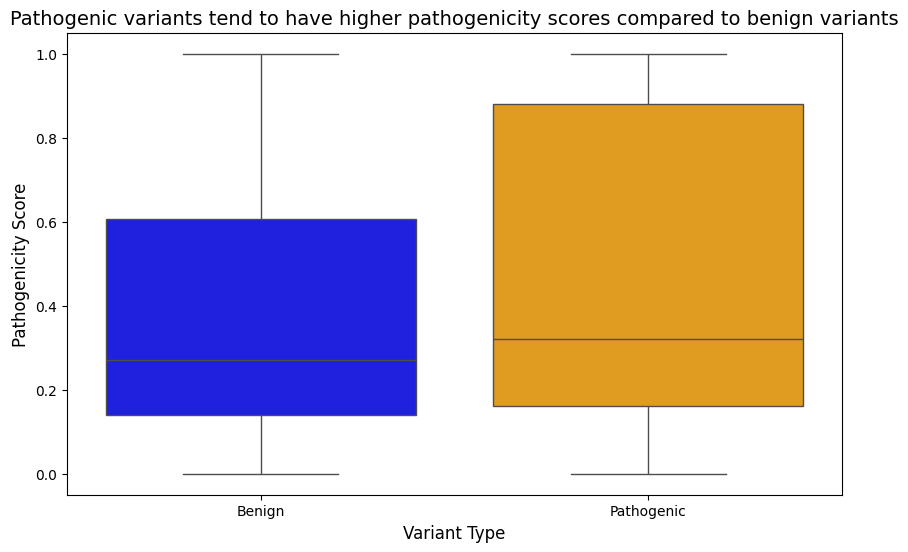

In [59]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=combined_data, x='Type', y='pathogenicity', palette={'Benign': 'blue', 'Pathogenic': 'orange'})
plt.title('Pathogenic variants tend to have higher pathogenicity scores compared to benign variants', fontsize=14)
plt.xlabel('Variant Type', fontsize=12)
plt.ylabel('Pathogenicity Score', fontsize=12)

plt.show()

To better understand the distribution of the scores, we will visualize using histograms for each variant type.

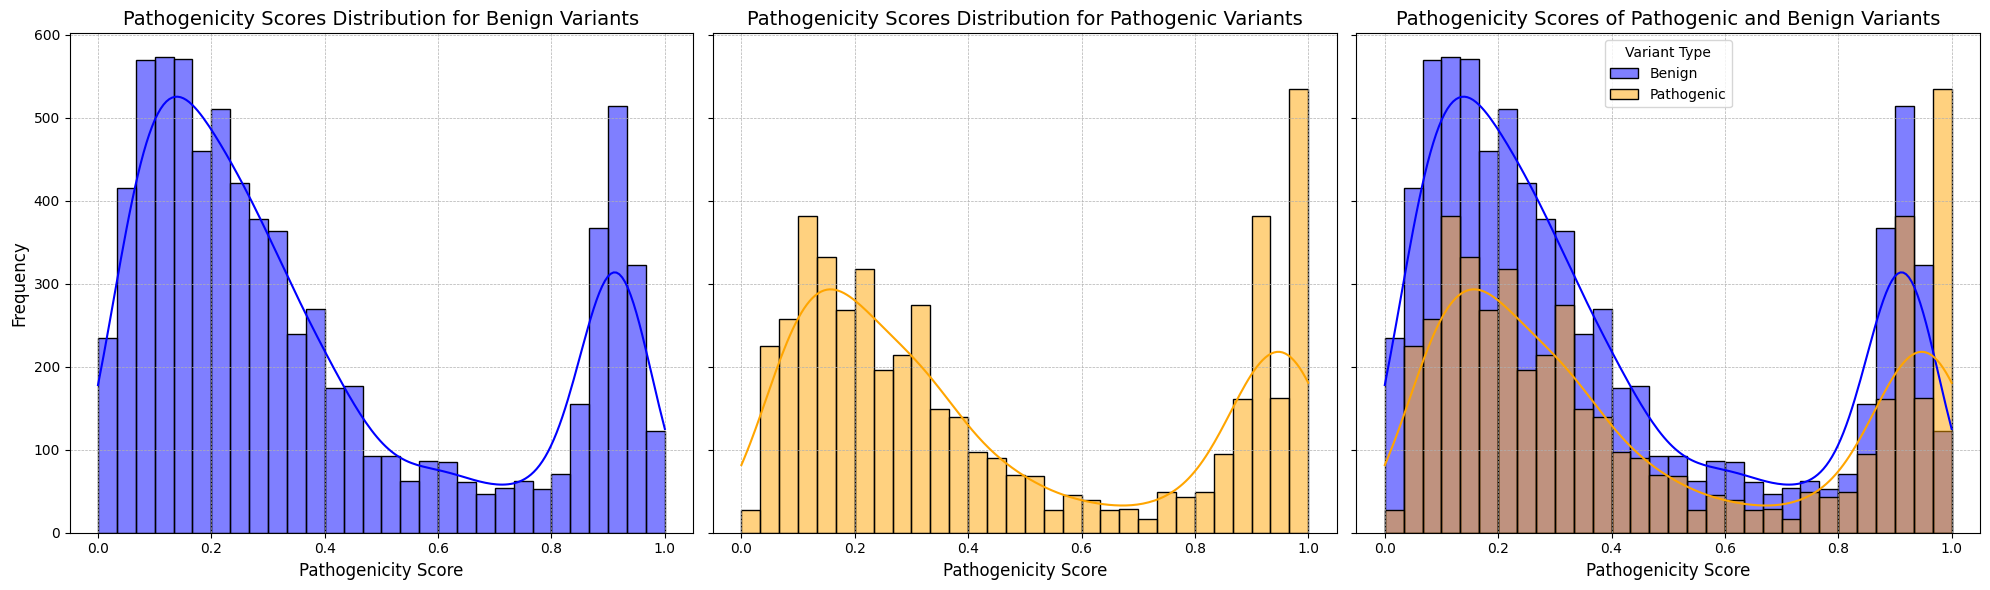

In [60]:
# we want to have the three plots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Histogram for benign variants
sns.histplot(benign_data['pathogenicity'].dropna(), kde=True, bins=30, color='blue', ax=axes[0])
axes[0].set_title('Pathogenicity Scores Distribution for Benign Variants', fontsize=14)
axes[0].set_xlabel('Pathogenicity Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Histogram for pathogenic variants
sns.histplot(pathogenic_data['pathogenicity'].dropna(), kde=True, bins=30, color='orange', ax=axes[1])
axes[1].set_title('Pathogenicity Scores Distribution for Pathogenic Variants', fontsize=14)
axes[1].set_xlabel('Pathogenicity Score', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# Overlaid Histogram of the two above for better comparison
sns.histplot(benign_data['pathogenicity'].dropna(), kde=True, color='blue', bins=30, label='Benign', alpha=0.5, ax=axes[2])
sns.histplot(pathogenic_data['pathogenicity'].dropna(), kde=True, color='orange', bins=30, label='Pathogenic', alpha=0.5, ax=axes[2])
axes[2].set_title('Pathogenicity Scores of Pathogenic and Benign Variants', fontsize=14)
axes[2].set_xlabel('Pathogenicity Score', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].legend(title='Variant Type', fontsize=10)
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

The following scatter plot visualizes the relationship between the delta_logit_psi and the pathogenicity scores for both benign and pathogenic variants. The x-axis represents the ΔLogit(PSI), which indicates the predicted effect of the variant on exon inclusion levels on a logit scale and the y-axis represents the pathogenicity score. Keep in mind the data imbalance, we have around 7500 benign data rows and only 4700 pathogenic.

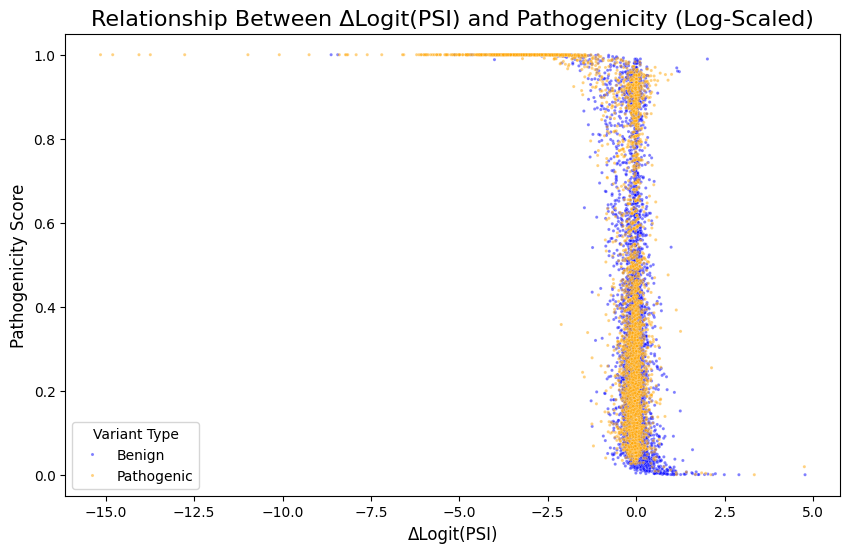

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='delta_logit_psi', y='pathogenicity', hue='Type', palette={'Benign': 'blue', 'Pathogenic': 'orange'}, alpha=0.5, s=5)
# plt.xscale('symlog') # for logscale on x-axis
plt.title('Relationship Between ΔLogit(PSI) and Pathogenicity (Log-Scaled)', fontsize=16)
plt.xlabel('ΔLogit(PSI)', fontsize=12)
plt.ylabel('Pathogenicity Score', fontsize=12)
plt.legend(title='Variant Type')
plt.show()

Main observations:
- S-curve --> non-linear correlation
- High pathogenicity scores have a low ΔLogit(PSI) --> strong exon exclusion effects (ΔLogit(PSI) < -2) especially in pathogenic variants
- For ΔLogit(PSI) around 0, pathogenicity scores range from 0 to 1, forming the transition point of the S-curve
- Low pathogenecity scores have a high ΔLogit(PSI) --> strong exon inclusion effects (ΔLogit(PSI) > 2)  especially in bingin variants

(Recap [MMSplice](https://github.com/gagneurlab/MMSplice_MTSplice?tab=readme-ov-file): The main score is predicted by MMSplice, which shows the effect of the variant on the inclusion level (PSI percent spliced in) of the exon. The score is on a logit scale. If the score is positive, it shows that variant leads higher inclusion rate for the exon. If the score is negative, it shows that variant leads higher exclusion rate for the exon. If delta_logit_psi is bigger than 2 or smaller than -2, the effect of variant can be considered strong.)

### Region-Wise Comparison

#### Boxplots of ΔLogit(PSI) across regions by variant type

Regions = where a variant occurs

positive ΔLogit(PSI) score: increased exon inclusion (>2 = strong effect)

negative ΔLogit(PSI) score: increased exon exclusion (<-2 = strong effect)

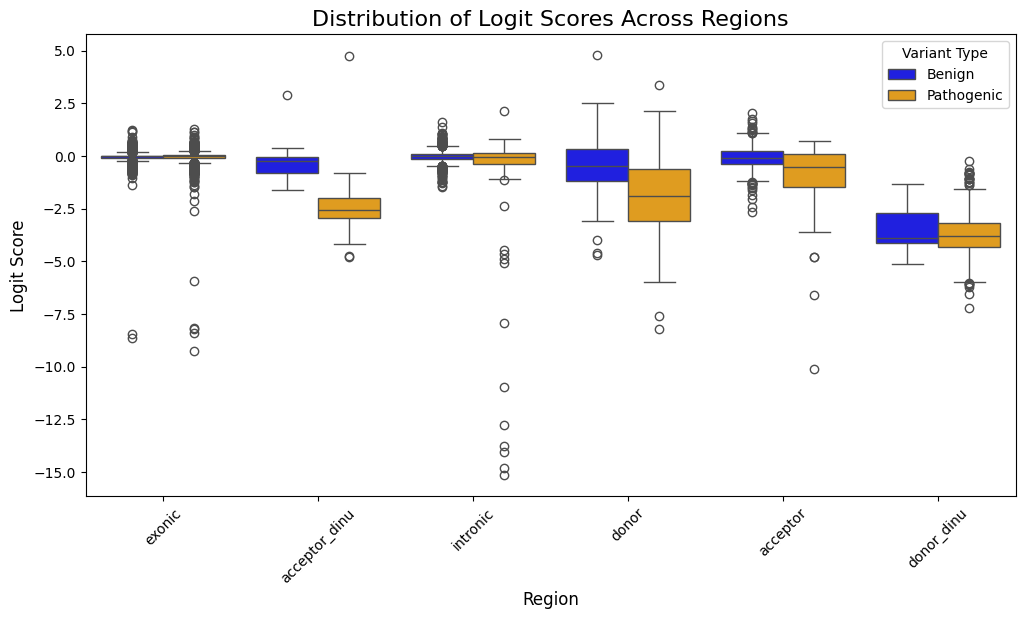

In [68]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='region', y='delta_logit_psi', hue='Type', palette={'Benign': 'blue', 'Pathogenic': 'orange'})

# plt.yscale('symlog') # for logarithmic y-axis
plt.title('Distribution of Logit Scores Across Regions', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Logit Score', fontsize=12)
plt.legend(title='Variant Type', loc='upper right')
plt.xticks(rotation=45)
plt.show()

#### Proportions of benign and pathogenic variants by region, visualized in a stacked barchart

The proportion of pathogenic variants is higher in certain regions such as donor- and acceptor-dinucleotide sites, compared to e.g. acceptor and intronic regions.

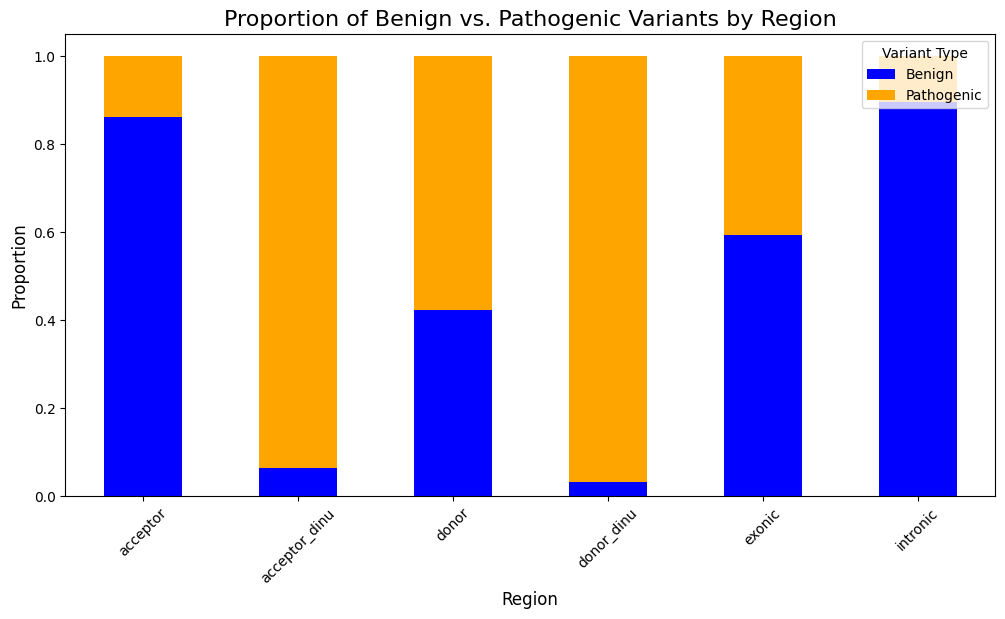

In [69]:
region_counts = combined_data.groupby(['region', 'Type']).size().unstack()
region_counts_normalized = region_counts.div(region_counts.sum(axis=1), axis=0)

region_counts_normalized.plot(kind='bar', stacked=True, figsize=(12, 6), color=['blue', 'orange'])
plt.title('Proportion of Benign vs. Pathogenic Variants by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Variant Type', loc='upper right')
plt.show()

#### Scatter plot of pathogenicity vs. ΔLogit(PSI) by region for benign and pathogenic variants

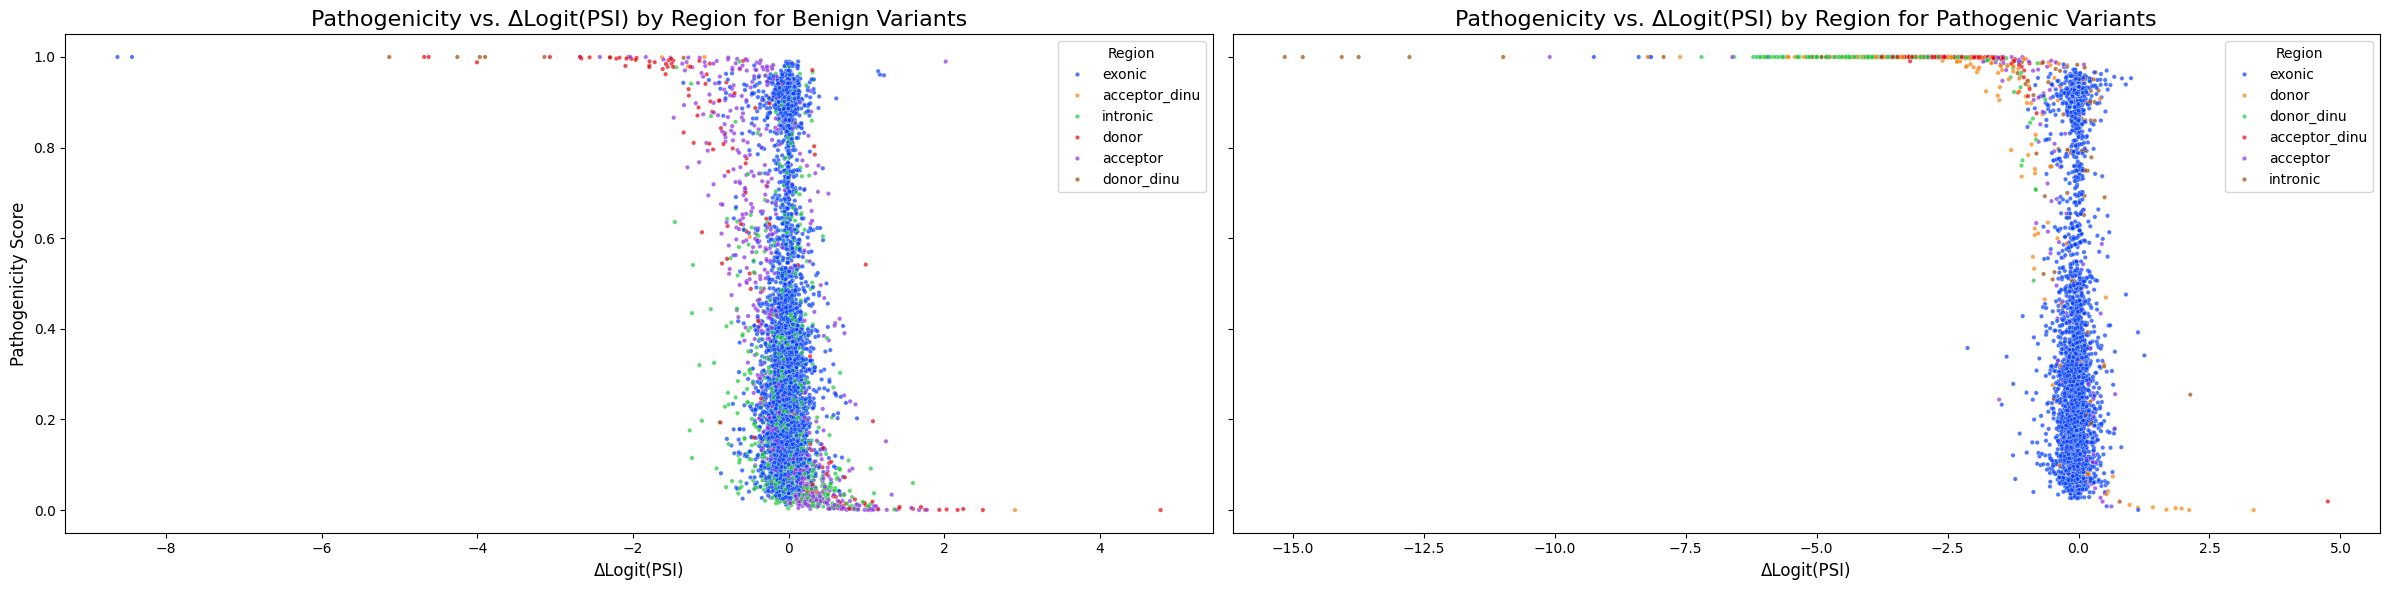

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(24, 6), sharey=True)

sns.scatterplot(data=benign_data, x='delta_logit_psi', y='pathogenicity', hue='region', palette='bright', alpha=0.7, s=10, ax=axes[0])
# plt.xscale('symlog') # for logscale on x-axis
axes[0].set_title('Pathogenicity vs. ΔLogit(PSI) by Region for Benign Variants', fontsize=16)
axes[0].set_xlabel('ΔLogit(PSI)', fontsize=12)
axes[0].set_ylabel('Pathogenicity Score', fontsize=12)
axes[0].legend(title='Region')

sns.scatterplot(data=pathogenic_data, x='delta_logit_psi', y='pathogenicity', hue='region', palette='bright', alpha=0.7, s=10, ax=axes[1])
# plt.xscale('symlog') # for logscale on x-axis
axes[1].set_title('Pathogenicity vs. ΔLogit(PSI) by Region for Pathogenic Variants', fontsize=16)
axes[1].set_xlabel('ΔLogit(PSI)', fontsize=12)
axes[1].set_ylabel('Pathogenicity Score', fontsize=12)
axes[1].legend(title='Region')

plt.tight_layout()
plt.show()

#### Mann Whitney U test
A statistical evidence if pathogenicity scores differ significantly between benign and pathogenic variant groups (since the data is not normally distributed)

H0 : the distribution of pathogenicity scores for benign and pathogenic variants is the same

H1 : the distribution of pathogenicity scores for benign and pathogenic variants is not the same

In [65]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(benign_data['pathogenicity'], pathogenic_data['pathogenicity'], alternative='two-sided')

print(f"Mann-Whitney U Test statistic: {stat}")
print(f"P-value: {p_value}")

Mann-Whitney U Test statistic: 15700064.0
P-value: 2.555561905011613e-35


Since the p-value is below the significance threshold of 0.05, we can reject the null hypothesis and this implies that we have evidence that the pathogenicity scores for benign and pathogenic variants differ.